In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
import seaborn as sns 

In [97]:
data = pd.read_excel("Water_data_500.xlsx")
data

,Sample ID,Mineral1,Mineral2,Mineral3,Mineral4,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,...,Mineral44,Mineral45,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking,WellType
0,Water1,4288.903571,30407.589293,94313.513074,2203.299565,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,...,0.469886,0.791154,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616,Yes,sample
1,Water2,5276.663393,10919.366383,147191.070757,272.943036,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,...,0.030511,0.075348,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565,Yes,sample
2,Water3,10396.790203,45975.267239,83153.300283,1125.102635,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,...,0.219686,0.244876,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115,Yes,sample
3,Water4,5632.958535,25244.535588,94778.345639,818.538328,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,...,0.030511,0.197788,0.196362,0.006471,0.244020,69.687534,0.1229,0.346655,Yes,sample
4,Water5,6912.703327,40862.673832,127847.738939,968.150441,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,...,0.067126,0.442669,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407,Yes,sample
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,Water533,4345.977672,20110.891500,111088.284483,788.382685,60059.097491,519313.335292,77566.925389,6668.392018,396164.278204,...,0.063499,0.077773,3.148169,<0.018,0.235278,7.542794,0.242435,0.253047,Yes,sample
533,Water534,3433.590707,8328.480679,106454.554378,423.721634,52865.252821,290337.834932,57181.087669,3927.157053,382487.717165,...,0.038652,0.073679,0.292114,<0.018,0.173295,6.016327,0.027316,0.08583,Yes,sample
534,Water535,5989.684443,42314.665979,113321.525386,259.113596,56121.398243,393518.174250,98282.227398,5931.018545,462745.747624,...,0.405853,0.814617,0.238716,<0.018,0.213774,8.467552,0.017072,1.049214,Yes,sample
535,Water536,2018.135780,34732.887382,104171.161706,480.942249,42764.493505,403627.154470,76663.148819,18502.271621,535665.955025,...,0.071783,0.057307,0.270125,<0.018,1.527277,5.313823,0.013658,0.051275,Yes,drilling


In [98]:
data["Drinking_code"] = data["Drinking"].apply(lambda x: int(x == "Yes"))
data = data.drop(["Sample ID"], axis = 1)
data

,Mineral1,Mineral2,Mineral3,Mineral4,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,...,Mineral45,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking,WellType,Drinking_code
0,4288.903571,30407.589293,94313.513074,2203.299565,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,53319.549467,...,0.791154,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616,Yes,sample,1
1,5276.663393,10919.366383,147191.070757,272.943036,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,44673.065922,...,0.075348,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565,Yes,sample,1
2,10396.790203,45975.267239,83153.300283,1125.102635,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,31568.240130,...,0.244876,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115,Yes,sample,1
3,5632.958535,25244.535588,94778.345639,818.538328,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,32368.535591,...,0.197788,0.196362,0.006471,0.244020,69.687534,0.1229,0.346655,Yes,sample,1
4,6912.703327,40862.673832,127847.738939,968.150441,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,26145.754851,...,0.442669,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407,Yes,sample,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,4345.977672,20110.891500,111088.284483,788.382685,60059.097491,519313.335292,77566.925389,6668.392018,396164.278204,22190.434590,...,0.077773,3.148169,<0.018,0.235278,7.542794,0.242435,0.253047,Yes,sample,1
533,3433.590707,8328.480679,106454.554378,423.721634,52865.252821,290337.834932,57181.087669,3927.157053,382487.717165,21478.444910,...,0.073679,0.292114,<0.018,0.173295,6.016327,0.027316,0.08583,Yes,sample,1
534,5989.684443,42314.665979,113321.525386,259.113596,56121.398243,393518.174250,98282.227398,5931.018545,462745.747624,28389.910937,...,0.814617,0.238716,<0.018,0.213774,8.467552,0.017072,1.049214,Yes,sample,1
535,2018.135780,34732.887382,104171.161706,480.942249,42764.493505,403627.154470,76663.148819,18502.271621,535665.955025,41934.349184,...,0.057307,0.270125,<0.018,1.527277,5.313823,0.013658,0.051275,Yes,drilling,1


In [99]:
(data["Drinking"].value_counts()/data["Drinking"].shape[0])

Yes    0.824953
No     0.175047
Name: Drinking, dtype: float64

In [100]:
data["Drinking"].isna().sum()

0

In [101]:
df = data.fillna(0)
df

,Mineral1,Mineral2,Mineral3,Mineral4,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,...,Mineral45,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking,WellType,Drinking_code
0,4288.903571,30407.589293,94313.513074,2203.299565,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,53319.549467,...,0.791154,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616,Yes,sample,1
1,5276.663393,10919.366383,147191.070757,272.943036,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,44673.065922,...,0.075348,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565,Yes,sample,1
2,10396.790203,45975.267239,83153.300283,1125.102635,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,31568.240130,...,0.244876,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115,Yes,sample,1
3,5632.958535,25244.535588,94778.345639,818.538328,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,32368.535591,...,0.197788,0.196362,0.006471,0.244020,69.687534,0.1229,0.346655,Yes,sample,1
4,6912.703327,40862.673832,127847.738939,968.150441,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,26145.754851,...,0.442669,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407,Yes,sample,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,4345.977672,20110.891500,111088.284483,788.382685,60059.097491,519313.335292,77566.925389,6668.392018,396164.278204,22190.434590,...,0.077773,3.148169,<0.018,0.235278,7.542794,0.242435,0.253047,Yes,sample,1
533,3433.590707,8328.480679,106454.554378,423.721634,52865.252821,290337.834932,57181.087669,3927.157053,382487.717165,21478.444910,...,0.073679,0.292114,<0.018,0.173295,6.016327,0.027316,0.08583,Yes,sample,1
534,5989.684443,42314.665979,113321.525386,259.113596,56121.398243,393518.174250,98282.227398,5931.018545,462745.747624,28389.910937,...,0.814617,0.238716,<0.018,0.213774,8.467552,0.017072,1.049214,Yes,sample,1
535,2018.135780,34732.887382,104171.161706,480.942249,42764.493505,403627.154470,76663.148819,18502.271621,535665.955025,41934.349184,...,0.057307,0.270125,<0.018,1.527277,5.313823,0.013658,0.051275,Yes,drilling,1


In [102]:
for row in range(df.shape[0]):
    for col in list(df.columns)[:-3]:
        if type(df.loc[row, col]) == str:
            df.loc[row, col] = np.nan

        elif df.loc[row, col] < 0:
            df.loc[row, col] = np.nan
df

,Mineral1,Mineral2,Mineral3,Mineral4,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,...,Mineral45,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking,WellType,Drinking_code
0,4288.903571,30407.589293,94313.513074,2203.299565,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,53319.549467,...,0.791154,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616,Yes,sample,1
1,5276.663393,10919.366383,147191.070757,272.943036,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,44673.065922,...,0.075348,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565,Yes,sample,1
2,10396.790203,45975.267239,83153.300283,1125.102635,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,31568.240130,...,0.244876,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115,Yes,sample,1
3,5632.958535,25244.535588,94778.345639,818.538328,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,32368.535591,...,0.197788,0.196362,0.006471,0.244020,69.687534,0.1229,0.346655,Yes,sample,1
4,6912.703327,40862.673832,127847.738939,968.150441,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,26145.754851,...,0.442669,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407,Yes,sample,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,4345.977672,20110.891500,111088.284483,788.382685,60059.097491,519313.335292,77566.925389,6668.392018,396164.278204,22190.434590,...,0.077773,3.148169,NaN,0.235278,7.542794,0.242435,0.253047,Yes,sample,1
533,3433.590707,8328.480679,106454.554378,423.721634,52865.252821,290337.834932,57181.087669,3927.157053,382487.717165,21478.444910,...,0.073679,0.292114,NaN,0.173295,6.016327,0.027316,0.08583,Yes,sample,1
534,5989.684443,42314.665979,113321.525386,259.113596,56121.398243,393518.174250,98282.227398,5931.018545,462745.747624,28389.910937,...,0.814617,0.238716,NaN,0.213774,8.467552,0.017072,1.049214,Yes,sample,1
535,2018.135780,34732.887382,104171.161706,480.942249,42764.493505,403627.154470,76663.148819,18502.271621,535665.955025,41934.349184,...,0.057307,0.270125,NaN,1.527277,5.313823,0.013658,0.051275,Yes,drilling,1


In [103]:
negative_conc = df.isna().sum()/df.shape[0]
negative_conc

Mineral1         0.000000
Mineral2         0.000000
Mineral3         0.000000
Mineral4         0.000000
Mineral5         0.000000
Mineral6         0.000000
Mineral7         0.000000
Mineral8         0.000000
Mineral9         0.000000
Mineral10        0.000000
Mineral11        0.001862
Mineral12        0.001862
Mineral13        0.003724
Mineral14        0.000000
Mineral15        0.000000
Mineral16        0.000000
Mineral17        0.000000
Mineral18        0.001862
Mineral19        0.000000
Mineral20        0.000000
Mineral21        0.000000
Mineral22        0.279330
Mineral23        0.003724
Mineral24        0.001862
Mineral25        0.000000
Mineral26        0.000000
Mineral27        0.001862
Mineral28        0.001862
Mineral29        0.020484
Mineral30        0.007449
Mineral31        0.000000
Mineral32        0.000000
Mineral33        0.001862
Mineral34        0.003724
Mineral35        0.000000
Mineral36        0.000000
Mineral37        0.000000
Mineral38        0.022346
Mineral39   

In [104]:
negative_conc.value_counts()

0.000000    30
0.001862     7
0.003724     4
0.022346     2
0.279330     1
0.020484     1
0.007449     1
0.024209     1
0.027933     1
0.018622     1
0.093110     1
0.026071     1
0.044693     1
0.428305     1
0.094972     1
dtype: int64

In [105]:
minerals_for_del0 = list()

for col in list(negative_conc.index):
    if negative_conc[col] > 0.9:
        minerals_for_del0.append(col)

minerals_for_del0

[]

In [106]:
df2 = df.fillna(0)
df2

,Mineral1,Mineral2,Mineral3,Mineral4,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,...,Mineral45,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking,WellType,Drinking_code
0,4288.903571,30407.589293,94313.513074,2203.299565,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,53319.549467,...,0.791154,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616,Yes,sample,1
1,5276.663393,10919.366383,147191.070757,272.943036,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,44673.065922,...,0.075348,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565,Yes,sample,1
2,10396.790203,45975.267239,83153.300283,1125.102635,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,31568.240130,...,0.244876,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115,Yes,sample,1
3,5632.958535,25244.535588,94778.345639,818.538328,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,32368.535591,...,0.197788,0.196362,0.006471,0.244020,69.687534,0.122900,0.346655,Yes,sample,1
4,6912.703327,40862.673832,127847.738939,968.150441,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,26145.754851,...,0.442669,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407,Yes,sample,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,4345.977672,20110.891500,111088.284483,788.382685,60059.097491,519313.335292,77566.925389,6668.392018,396164.278204,22190.434590,...,0.077773,3.148169,0.000000,0.235278,7.542794,0.242435,0.253047,Yes,sample,1
533,3433.590707,8328.480679,106454.554378,423.721634,52865.252821,290337.834932,57181.087669,3927.157053,382487.717165,21478.444910,...,0.073679,0.292114,0.000000,0.173295,6.016327,0.027316,0.085830,Yes,sample,1
534,5989.684443,42314.665979,113321.525386,259.113596,56121.398243,393518.174250,98282.227398,5931.018545,462745.747624,28389.910937,...,0.814617,0.238716,0.000000,0.213774,8.467552,0.017072,1.049214,Yes,sample,1
535,2018.135780,34732.887382,104171.161706,480.942249,42764.493505,403627.154470,76663.148819,18502.271621,535665.955025,41934.349184,...,0.057307,0.270125,0.000000,1.527277,5.313823,0.013658,0.051275,Yes,drilling,1


In [107]:
corr_mat = df2.corr().apply(np.abs)
corr_mat.head()

,Mineral1,Mineral2,Mineral3,Mineral4,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,...,Mineral43,Mineral44,Mineral45,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking_code
Mineral1,1.000000,0.367592,0.432780,0.134199,0.275228,0.221544,0.274231,0.226760,0.394564,0.225422,...,0.239035,0.278996,0.267096,0.044612,0.255098,0.112318,0.050617,0.160921,0.253167,0.348772
Mineral2,0.367592,1.000000,0.420281,0.163560,0.193505,0.216501,0.355401,0.604584,0.228559,0.133980,...,0.279469,0.259940,0.338651,0.001608,0.281666,0.127836,0.058622,0.148780,0.232905,0.240772
Mineral3,0.432780,0.420281,1.000000,0.161990,0.393345,0.440973,0.389255,0.371246,0.271900,0.215338,...,0.342572,0.360070,0.413962,0.034510,0.303014,0.113386,0.052421,0.176604,0.235002,0.344554
Mineral4,0.134199,0.163560,0.161990,1.000000,0.242340,0.087405,0.098089,0.022484,0.143471,0.324849,...,0.458358,0.510451,0.407421,0.261117,0.244597,0.188614,0.174760,0.338594,0.143605,0.007819
Mineral5,0.275228,0.193505,0.393345,0.242340,1.000000,0.317409,0.319643,0.010532,0.194583,0.098332,...,0.236611,0.284922,0.249779,0.064224,0.269056,0.148916,0.022906,0.175781,0.343389,0.146101


<AxesSubplot:>

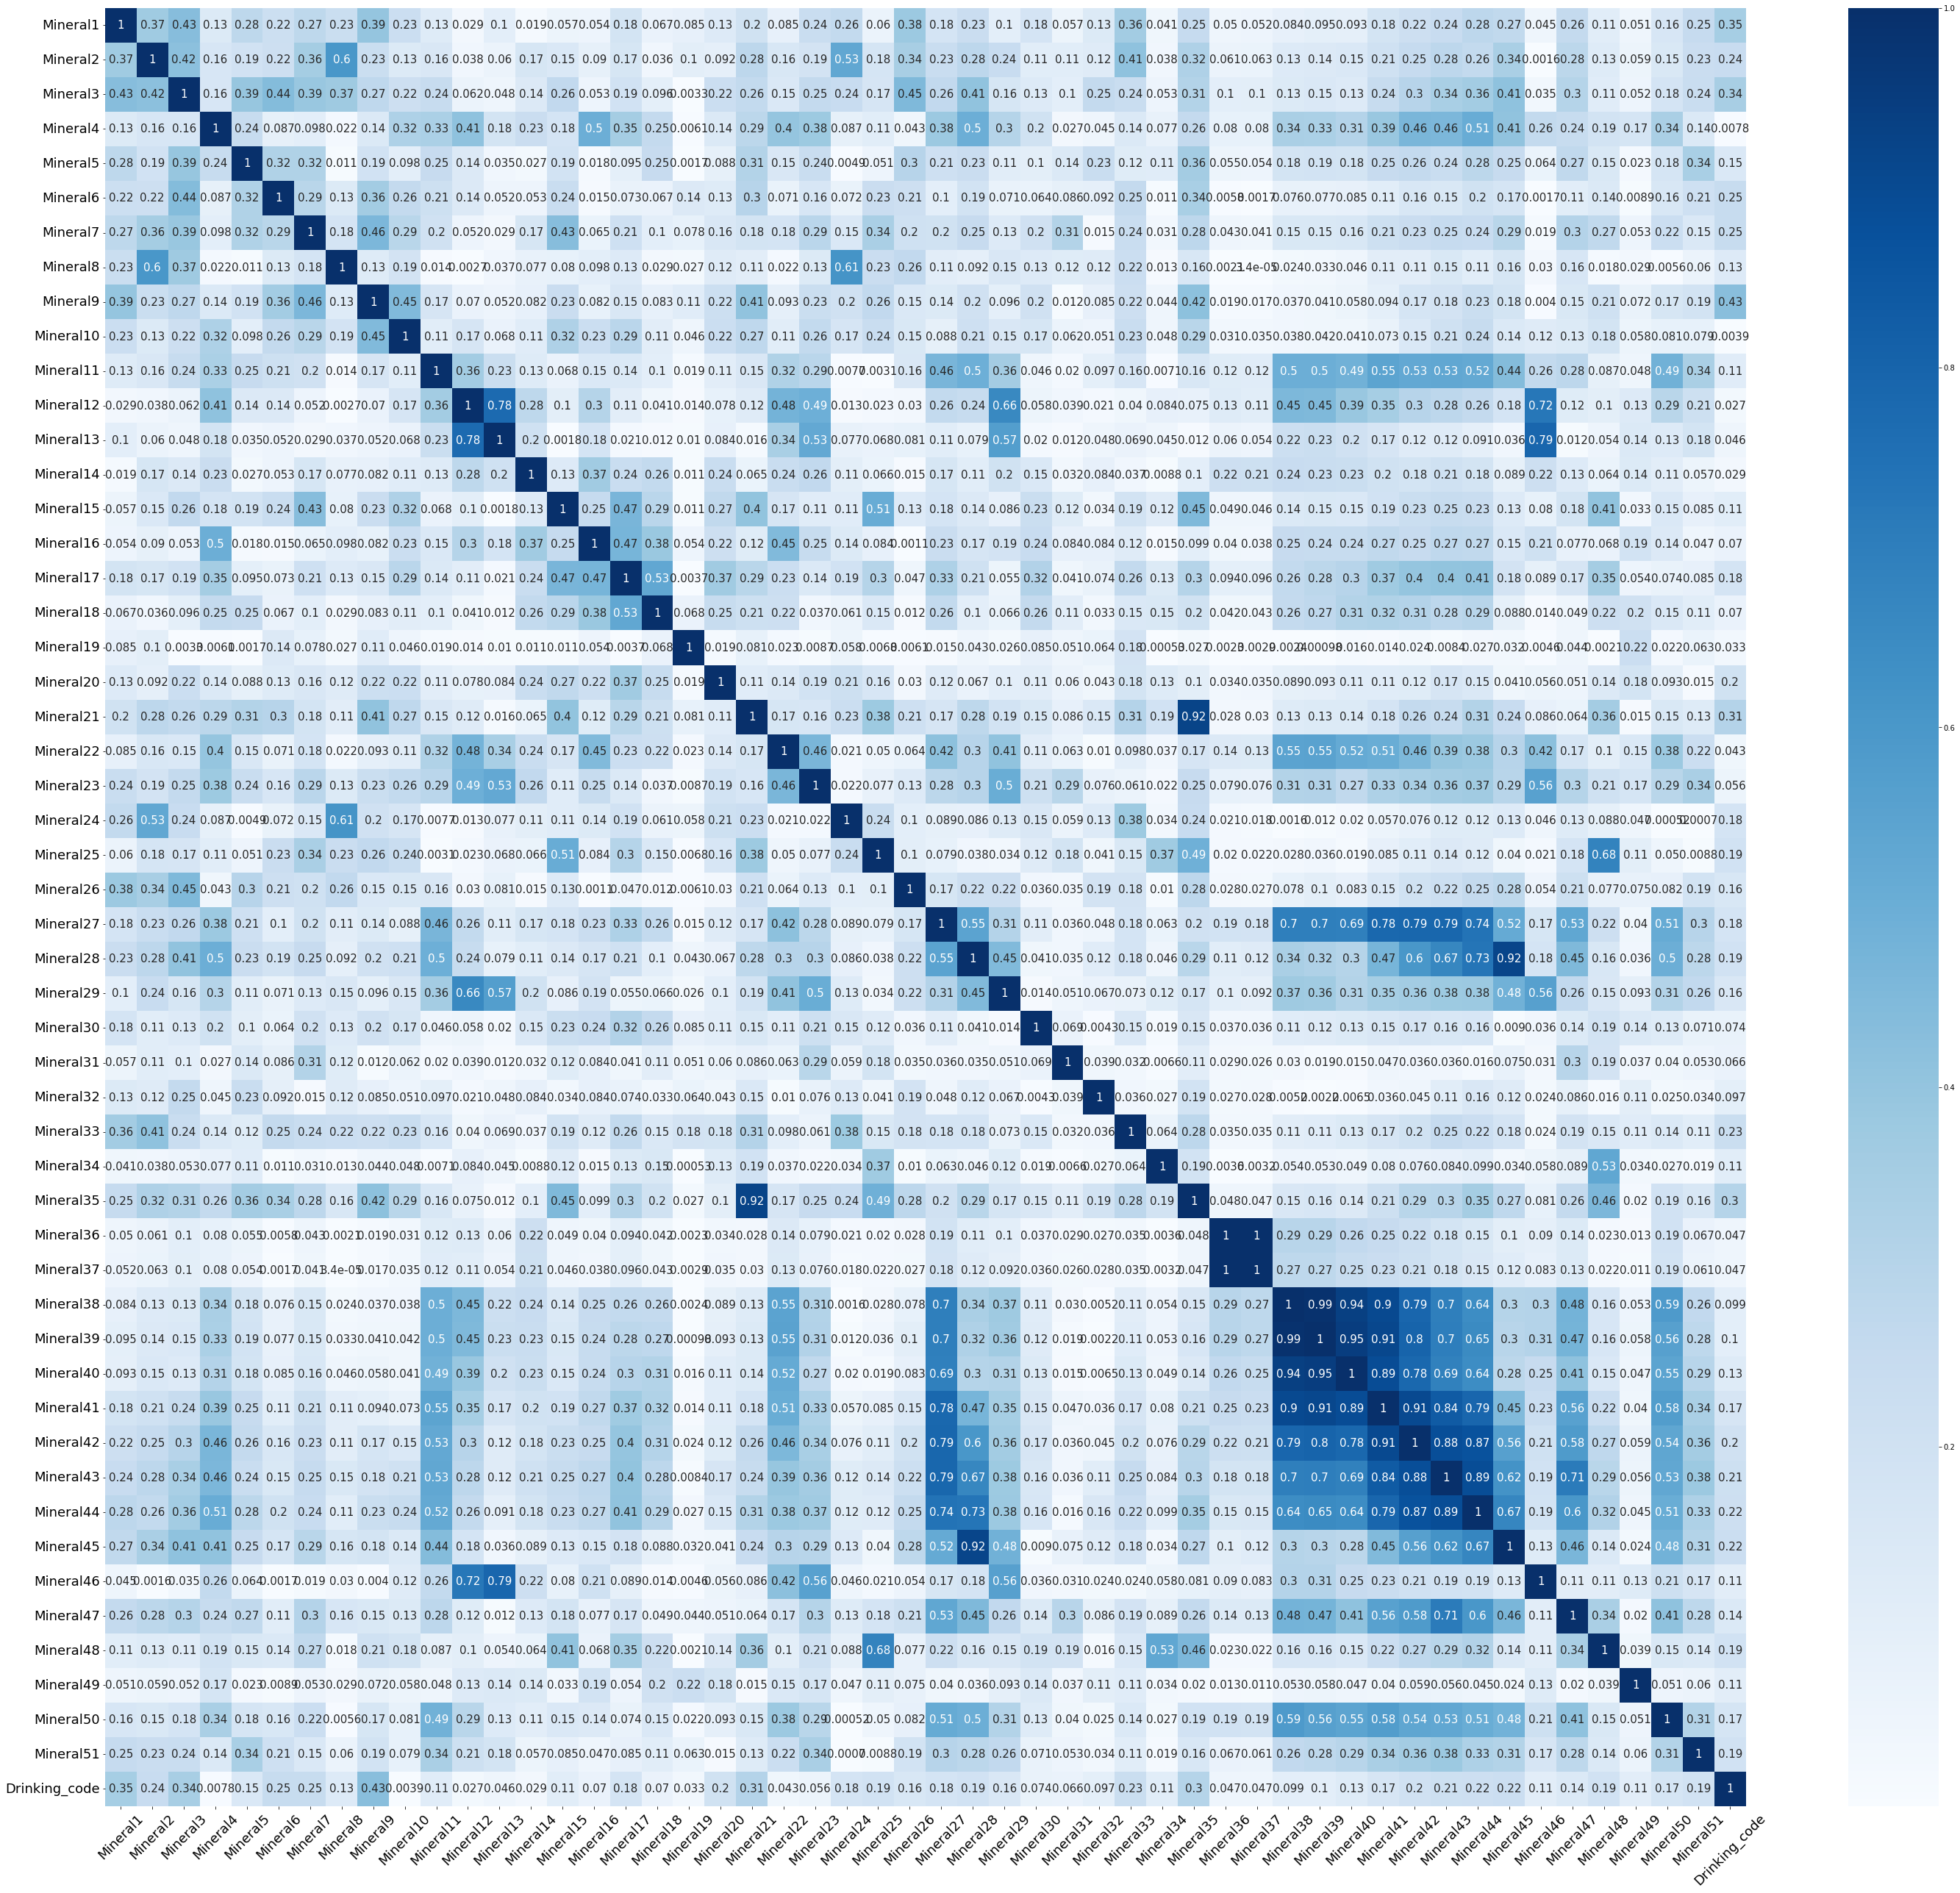

In [108]:
fig = plt.figure(figsize=(50, 45))

corr_map = sns.heatmap(corr_mat, annot = True, cmap = "Blues", annot_kws = {"fontsize":15})
corr_map.set_xticklabels(corr_map.get_xmajorticklabels(),fontsize = 18, rotation = 45)
corr_map.set_yticklabels(corr_map.get_ymajorticklabels(),fontsize = 18, rotation = 0)

corr_map

In [109]:
minerals_for_del = ["Mineral35","Mineral37", "Mineral39", "Mineral40", "Mineral41", "Mineral44", "Mineral45"]
dframe = df2.drop(minerals_for_del + ["Drinking", "WellType"], axis = 1)
dframe

,Mineral1,Mineral2,Mineral3,Mineral4,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,...,Mineral38,Mineral42,Mineral43,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking_code
0,4288.903571,30407.589293,94313.513074,2203.299565,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,53319.549467,...,0.421587,0.290552,0.058238,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616,1
1,5276.663393,10919.366383,147191.070757,272.943036,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,44673.065922,...,0.025942,0.031778,0.010353,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565,1
2,10396.790203,45975.267239,83153.300283,1125.102635,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,31568.240130,...,0.196733,0.204290,0.024589,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115,1
3,5632.958535,25244.535588,94778.345639,818.538328,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,32368.535591,...,0.012971,0.031779,0.006471,0.196362,0.006471,0.244020,69.687534,0.122900,0.346655,1
4,6912.703327,40862.673832,127847.738939,968.150441,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,26145.754851,...,0.114579,0.104416,0.009059,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,4345.977672,20110.891500,111088.284483,788.382685,60059.097491,519313.335292,77566.925389,6668.392018,396164.278204,22190.434590,...,0.109078,0.083106,0.009546,3.148169,0.000000,0.235278,7.542794,0.242435,0.253047,1
533,3433.590707,8328.480679,106454.554378,423.721634,52865.252821,290337.834932,57181.087669,3927.157053,382487.717165,21478.444910,...,0.018566,0.027702,0.003580,0.292114,0.000000,0.173295,6.016327,0.027316,0.085830,1
534,5989.684443,42314.665979,113321.525386,259.113596,56121.398243,393518.174250,98282.227398,5931.018545,462745.747624,28389.910937,...,0.073105,0.098024,0.016109,0.238716,0.000000,0.213774,8.467552,0.017072,1.049214,1
535,2018.135780,34732.887382,104171.161706,480.942249,42764.493505,403627.154470,76663.148819,18502.271621,535665.955025,41934.349184,...,0.016245,0.014916,0.000000,0.270125,0.000000,1.527277,5.313823,0.013658,0.051275,1


c:\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

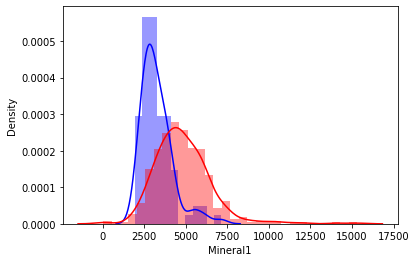

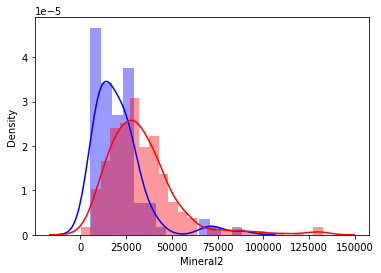

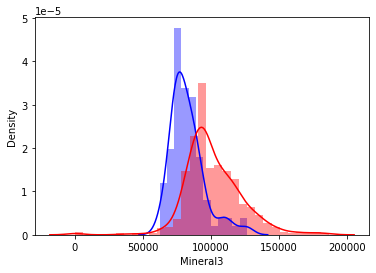

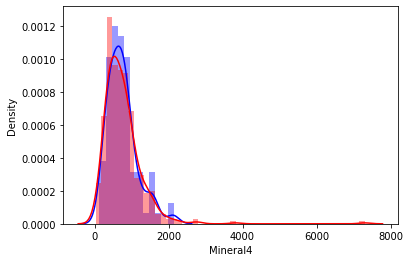

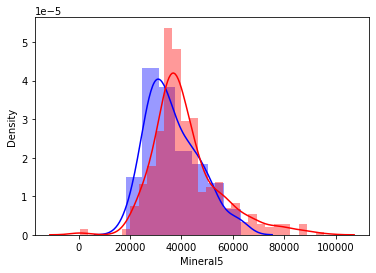

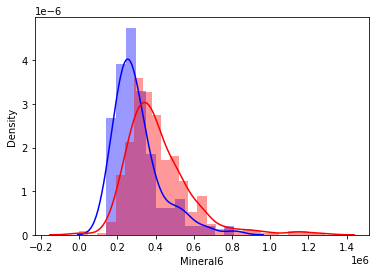

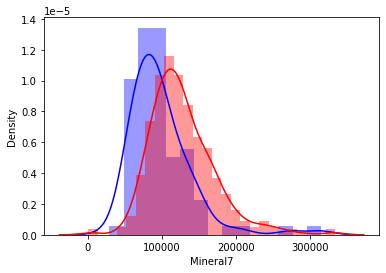

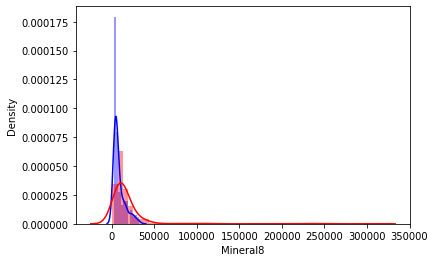

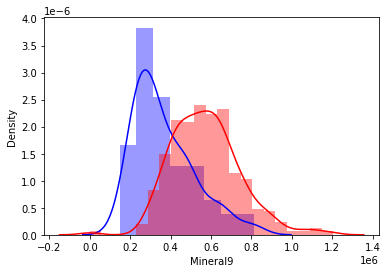

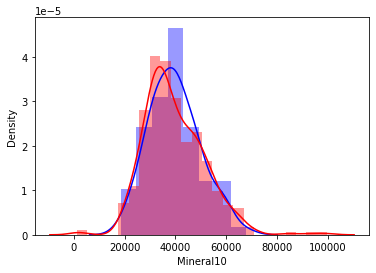

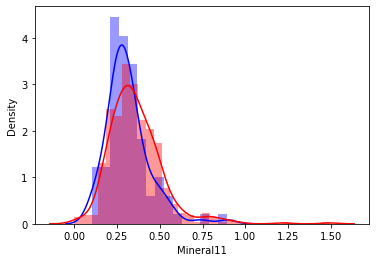

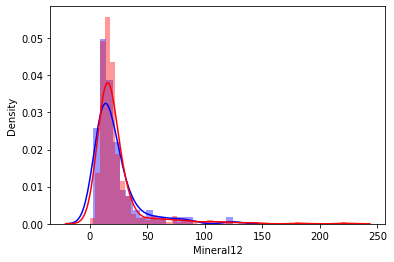

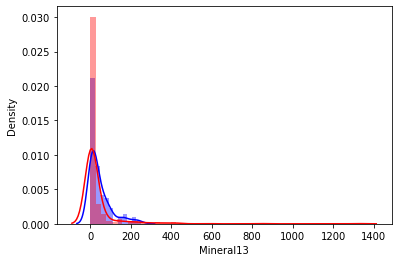

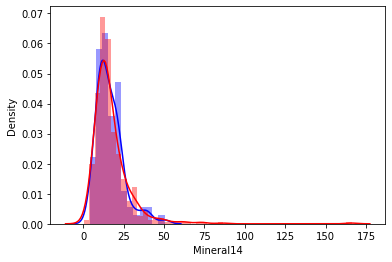

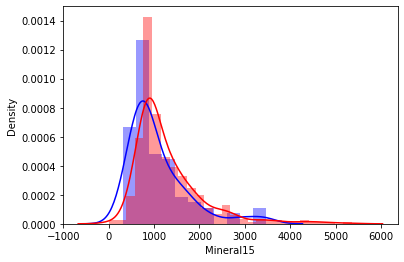

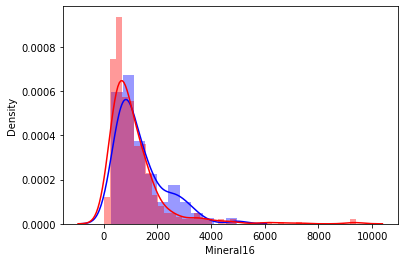

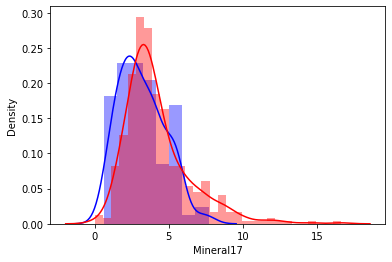

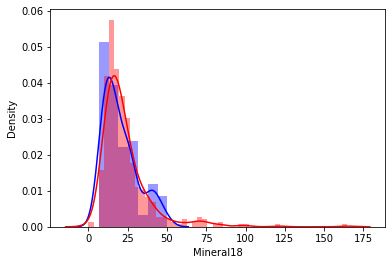

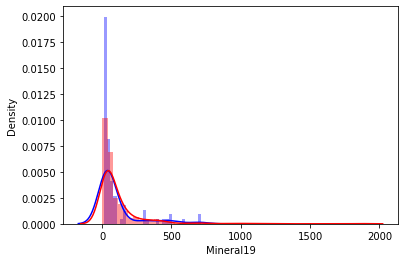

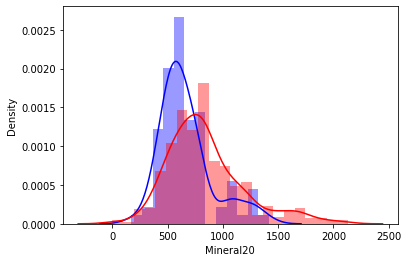

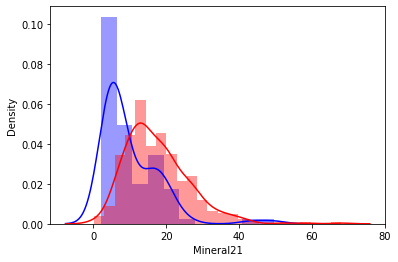

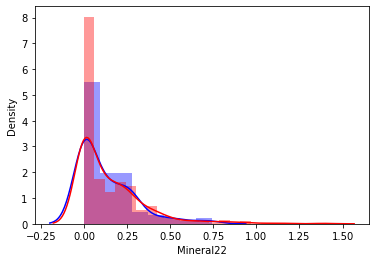

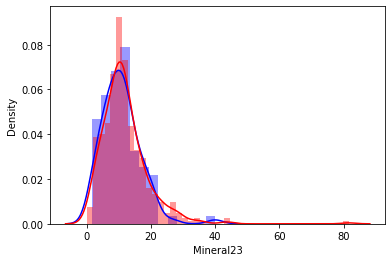

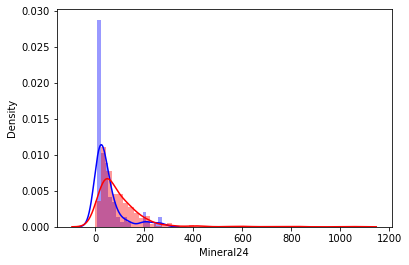

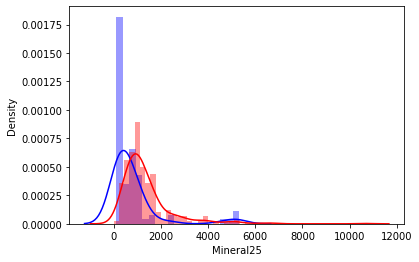

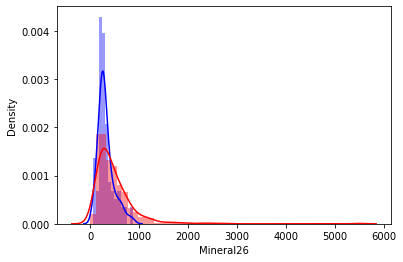

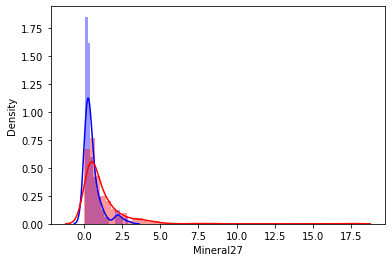

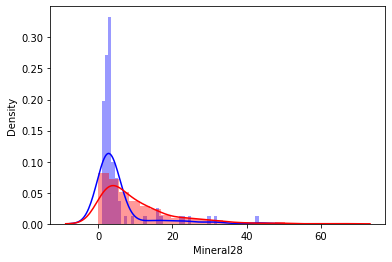

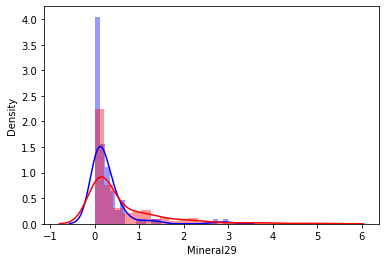

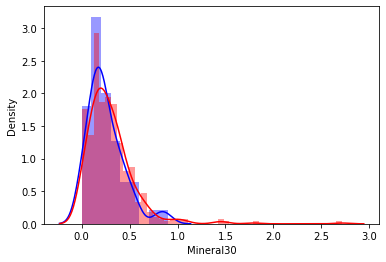

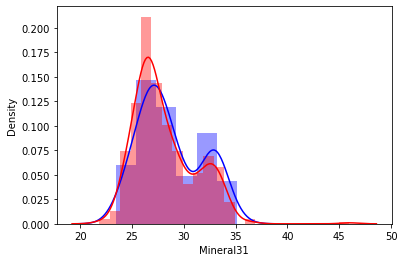

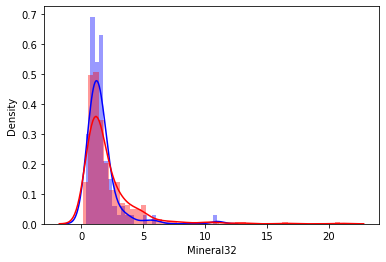

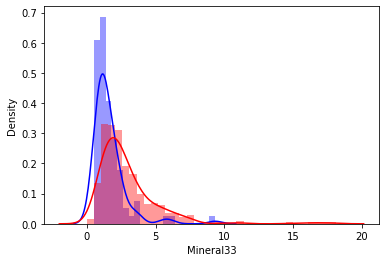

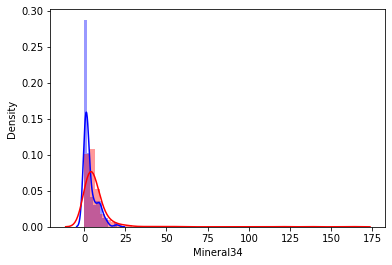

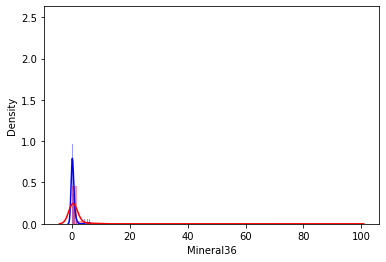

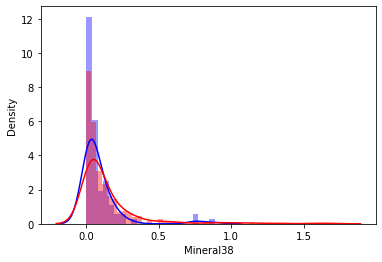

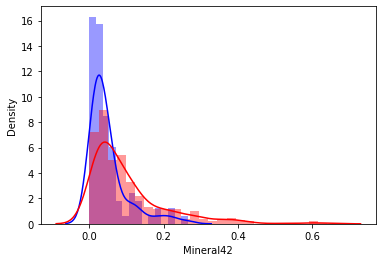

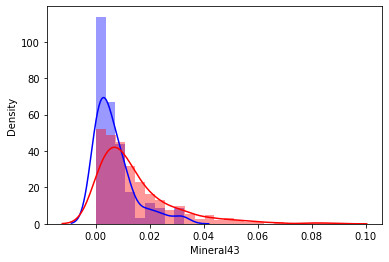

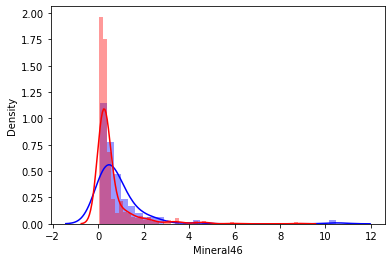

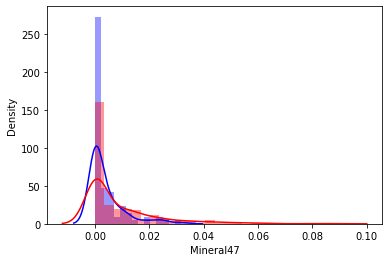

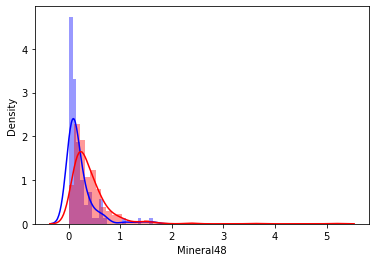

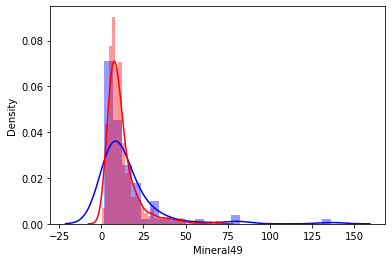

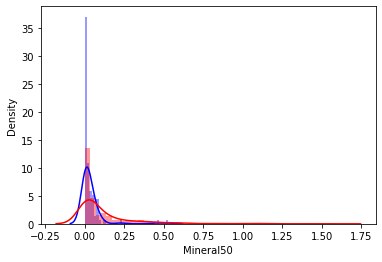

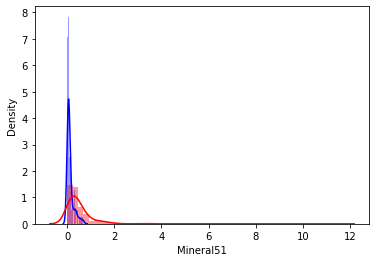

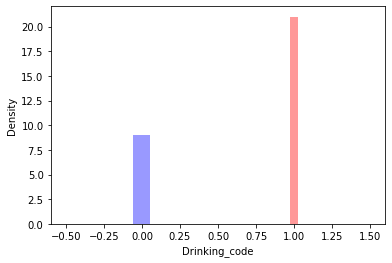

In [110]:
for col in dframe.columns:
    fig = plt.figure()
    sns.distplot(dframe.loc[df2["Drinking_code"] == 0][col], color = "blue")
    sns.distplot(dframe.loc[df2["Drinking_code"] == 1][col], color = "red")

In [111]:
minerals_for_del2 = ["Mineral4","Mineral12","Mineral13","Mineral14","Mineral18","Mineral19",
                     "Mineral22", "Mineral36", "Mineral38"]

dframe2 = dframe.drop(minerals_for_del2, axis = 1)
dframe2

,Mineral1,Mineral2,Mineral3,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,Mineral11,...,Mineral34,Mineral42,Mineral43,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51,Drinking_code
0,4288.903571,30407.589293,94313.513074,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,53319.549467,0.544023,...,2.329281,0.290552,0.058238,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616,1
1,5276.663393,10919.366383,147191.070757,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,44673.065922,0.596681,...,0.557514,0.031778,0.010353,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565,1
2,10396.790203,45975.267239,83153.300283,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,31568.240130,0.228143,...,9.612967,0.204290,0.024589,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115,1
3,5632.958535,25244.535588,94778.345639,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,32368.535591,0.105294,...,1.010837,0.031779,0.006471,0.196362,0.006471,0.244020,69.687534,0.122900,0.346655,1
4,6912.703327,40862.673832,127847.738939,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,26145.754851,0.175490,...,4.044062,0.104416,0.009059,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,4345.977672,20110.891500,111088.284483,60059.097491,519313.335292,77566.925389,6668.392018,396164.278204,22190.434590,0.275408,...,6.327612,0.083106,0.009546,3.148169,0.000000,0.235278,7.542794,0.242435,0.253047,1
533,3433.590707,8328.480679,106454.554378,52865.252821,290337.834932,57181.087669,3927.157053,382487.717165,21478.444910,0.297439,...,6.195250,0.027702,0.003580,0.292114,0.000000,0.173295,6.016327,0.027316,0.085830,1
534,5989.684443,42314.665979,113321.525386,56121.398243,393518.174250,98282.227398,5931.018545,462745.747624,28389.910937,0.308455,...,0.948607,0.098024,0.016109,0.238716,0.000000,0.213774,8.467552,0.017072,1.049214,1
535,2018.135780,34732.887382,104171.161706,42764.493505,403627.154470,76663.148819,18502.271621,535665.955025,41934.349184,0.220327,...,119.701149,0.014916,0.000000,0.270125,0.000000,1.527277,5.313823,0.013658,0.051275,1


In [112]:
X = dframe2.drop(["Drinking_code"], axis = 1)
Y = dframe2["Drinking_code"]

In [113]:
X.head()

,Mineral1,Mineral2,Mineral3,Mineral5,Mineral6,Mineral7,Mineral8,Mineral9,Mineral10,Mineral11,...,Mineral33,Mineral34,Mineral42,Mineral43,Mineral46,Mineral47,Mineral48,Mineral49,Mineral50,Mineral51
0,4288.903571,30407.589293,94313.513074,39057.436052,407094.446683,115789.213008,16696.520978,683573.500169,53319.549467,0.544023,...,2.231268,2.329281,0.290552,0.058238,1.691828,0.058238,1.112943,12.924274,0.589924,0.850616
1,5276.663393,10919.366383,147191.070757,87029.915224,498382.891953,59737.365137,25983.512759,814420.833344,44673.065922,0.596681,...,1.789208,0.557514,0.031778,0.010353,0.226568,0.010353,0.188559,3.788623,0.009832,11.442565
2,10396.790203,45975.267239,83153.300283,61464.813968,426141.298075,236688.576638,18569.220301,640656.958040,31568.240130,0.228143,...,6.399407,9.612967,0.204290,0.024589,1.963734,0.024589,1.013110,9.934577,0.054075,1.316115
3,5632.958535,25244.535588,94778.345639,36827.288341,448244.245434,120181.208175,11694.529093,676399.183514,32368.535591,0.105294,...,2.462824,1.010837,0.031779,0.006471,0.196362,0.006471,0.244020,69.687534,0.122900,0.346655
4,6912.703327,40862.673832,127847.738939,50516.407123,293466.286072,141323.087518,8257.715588,363515.211315,26145.754851,0.175490,...,2.231265,4.044062,0.104416,0.009059,0.249228,0.009059,0.439986,15.249962,0.142562,0.526407


In [114]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Drinking_code, dtype: int64

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)

In [116]:
from xgboost import XGBClassifier, plot_importance
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
xgboost_params = {
    'n_estimators': 1100,
    'learning_rate': 0.01,
    'colsample_bytree': 0.5,
    'subsample': 0.5,
    'min_child_weight': 2,
    # 'early_stopping_rounds': 20,
    'max_depth': 3,
    'gamma': 1.50,
    'objective': 'binary:logistic',
    'seed': 1569
}

model = XGBClassifier(**xgboost_params)

In [118]:
weights = class_weight.compute_sample_weight(class_weight = "balanced", y = y_train)
sw = pd.Series(data = weights)
sw.unique()

array([0.609375  , 2.78571429])

In [119]:
model.fit(x_train, y_train, sample_weight= weights)
None

c:\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [120]:
y_train_pred = model.predict(x_train)

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        83
           1       0.98      1.00      0.99       346

    accuracy                           0.99       429
   macro avg       0.99      0.96      0.98       429
weighted avg       0.99      0.99      0.99       429



In [121]:
y_pred = model.predict(x_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.98      0.97      0.97        92

    accuracy                           0.95       108
   macro avg       0.90      0.92      0.91       108
weighted avg       0.96      0.95      0.95       108



In [122]:
types = ["No drinking", "Drinking"]

cf_mat = confusion_matrix(y_test, y_pred)
res = pd.DataFrame(cf_mat, types, types)
res

,No drinking,Drinking
No drinking,14,3
Drinking,2,89


In [123]:
accuracy = 0

for i in range(res.shape[0]):
    accuracy += res.iloc[i,i]

accuracy /= res.sum().sum()
accuracy = round(accuracy, 2)

accuracy

0.95

Text(51.0, 0.5, 'Real')

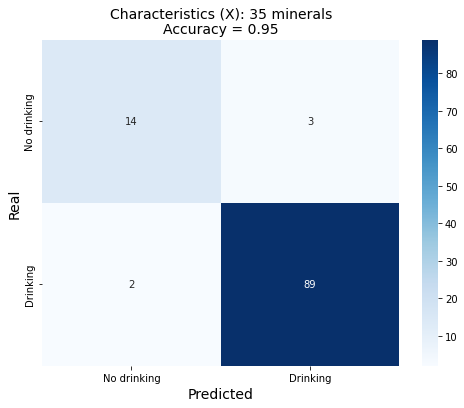

In [124]:
fig = plt.figure(figsize=(8, 6))

ax = sns.heatmap(res, annot = True, cmap = 'Blues')

ax.set_title(f'Characteristics (X): {X.shape[1]} minerals\nAccuracy = {accuracy}', fontsize = 14)
ax.set_xlabel('Predicted', fontsize = 14)
ax.set_ylabel('Real', fontsize = 14)

In [125]:
cv_res = cross_validate(model, X, Y, cv = 5)
cv_ser = pd.Series(data = cv_res["test_score"])
cv_ser = cv_ser.apply(lambda x: round(x, 2))

c:\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [126]:
mean_acc = cv_res["test_score"].mean()

print(cv_ser)
print(f"Mean accuracy: {round(mean_acc, 2)}")

0    0.94
1    0.96
2    0.92
3    0.93
4    0.93
dtype: float64
Mean accuracy: 0.94


In [127]:
model.save_model("Model_drinking.json")